# Project 2: Predicting-diabetes-outcome-for-women

## YOUR NAME HERE, Mahamadou Ousmane KEITA

# I. Introduction: a description of the dataset and the problem at hand

The project focuses on predicting diabetes outcomes using machine learning models based on the **TAIPEI_diabetes.csv dataset**, which contains data on **15,000 women aged 20–80** who visited Taipei Municipal Medical Center between 2018–2022. The dataset includes **8 features** such as pregnancies, plasma glucose levels, BMI, and family history, with the target variable indicating whether diabetes was diagnosed. 

The objective is to build and deploy a predictive model capable of classifying individuals as diabetic or non-diabetic. The end product will be a **web application** that allows users to input individual health metrics and receive a diabetes prediction in real time, supporting better diagnostic decision-making.

# II. Exploratory Data Analysis and Feature engineering

Let's first have a look at few individuals from the dataset so that, we can have a more detailed inside about the structure of the data.

In [1]:
import pandas as pd

df= pd.read_csv("TAIPEI_diabetes.csv")

df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


As we can sse, we have mostly numerical variable which correlate with what we have been told on the project instructions.

We can notice that we have the **Diabetic** variable which is our variable to predict is in fact categorial with **0** meaning that the individual hace no diabetic diagnosed and **1** overwise.

For now, let's focus on the **PatientID** variable which as is name suggest is the ID of our patient.

Let's check if we may have some patient that some extra diagnose on the dataset.

In [2]:
### Check if all values in the column are unique

# Print the result
if df["PatientID"].is_unique:
    print(f"All values in the column PatientID are unique.")
else:
    print(f"The column PatientID contains duplicate values.")

    # Display duplicate values (if any)
    df_duplicated = df[df["PatientID"].duplicated()]
    print("\nWe have",len(df_duplicated),"duplicate values in the column PatientID \n ")
    print("The total number of individuals on the dataset with a duplicated PatientID is:",
    len(df[df["PatientID"].duplicated(keep=False)]["PatientID"]))

The column PatientID contains duplicate values.

We have 105 duplicate values in the column PatientID 
 
The total number of individuals on the dataset with a duplicated PatientID is: 210


Has we can see it, we have 105 Patient that have more than 1 input on the dataset for a total number of 210 duplicated PatientID on the dataset, so we can understand that the same Patient comeback twice to register is information.

So before we decide to either, delete the duplicated values or to keep them, we need to be sure about the value they add to the dataset.

Let's check that with an example here.

In [3]:
#One example
df[ df["PatientID"] == df_duplicated["PatientID"].iloc[0] ]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
760,1429759,8,92,67,48,171,36.300158,0.153597,39,1
1685,1429759,1,113,65,20,73,45.593722,0.768987,46,1


I this example, we can see that, for the same PatientID, we can have completely different information except for the predictable variable which is the **Diabetic** colonne.

Which is interesting because if we can have for information about our **Diabetic** variable, no matter the case of diagnosed postive or negative.

Let's just make sure that the duplicated PatientID all brings about new informations.

In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

print("We have in reality",
                            len(df),
        "individual that are not duplicated.")

We have in reality 15000 individual that are not duplicated.


So now, we know that all the informations on the dataset are unique and add value to the dataset (15000 being the total individuals from the complete database). 

We can move on with an other topic.

Let's check if we have missing values on the dataset

<Axes: >

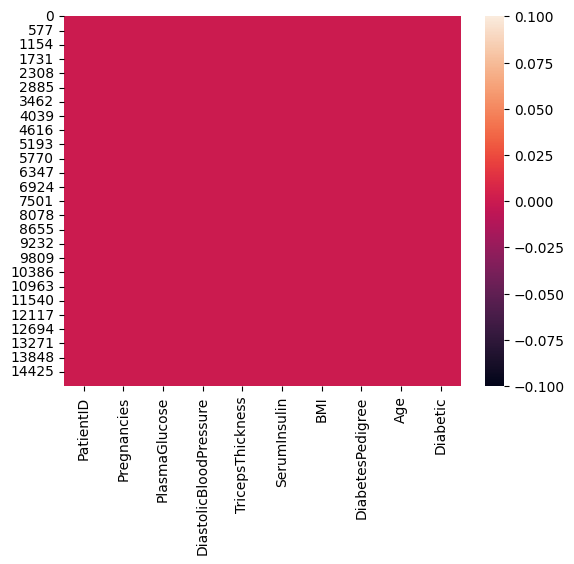

In [5]:
import seaborn as sns

sns.heatmap(df.isna())

No missing values ​​so we can move on.

We will drop the **PatientID** for the rest of the work because, it not useful and take space for nothing.

Now it time to check if we have outliers we need to worry about and inbalances on the **Diabetic** variable we need to consider.

In [6]:
#Let's drop the PatientID columns

df.drop(columns="PatientID", inplace=True)

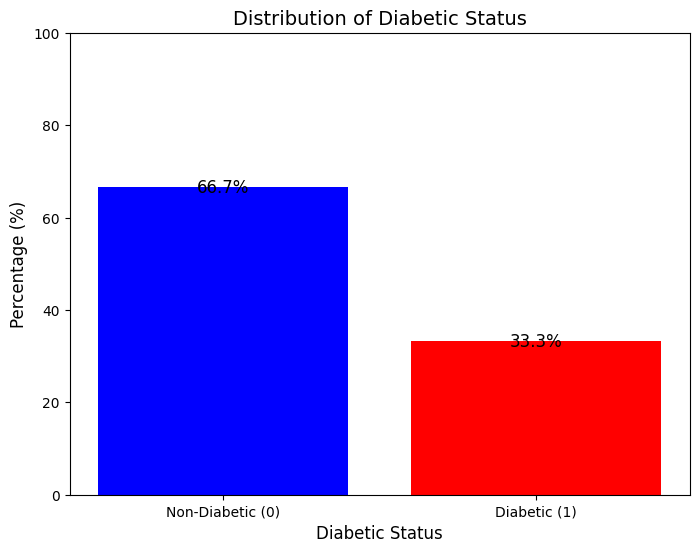

In [7]:
import matplotlib.pyplot as plt

# Calculate percentages
counts = df['Diabetic'].value_counts(normalize=True) * 100

# Define colors for the binary values
colors = {0: 'blue', 1: 'red'}

# Plot histogram
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts, color=[colors[val] for val in counts.index])

# Add percentage text on top of bars
for bar, percentage in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2,
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'])
plt.xlabel("Diabetic Status", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Diabetic Status", fontsize=14)
plt.ylim(0, 100)  # Ensure the y-axis goes up to 100%

plt.show()

We have inbalance in the variable to predict which is the variable **Diabetic**, so we need to take that in cosideration when dealing with outliers.

C:\Users\kmaha\AppData\Local\Temp\ipykernel_28408\3434469444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


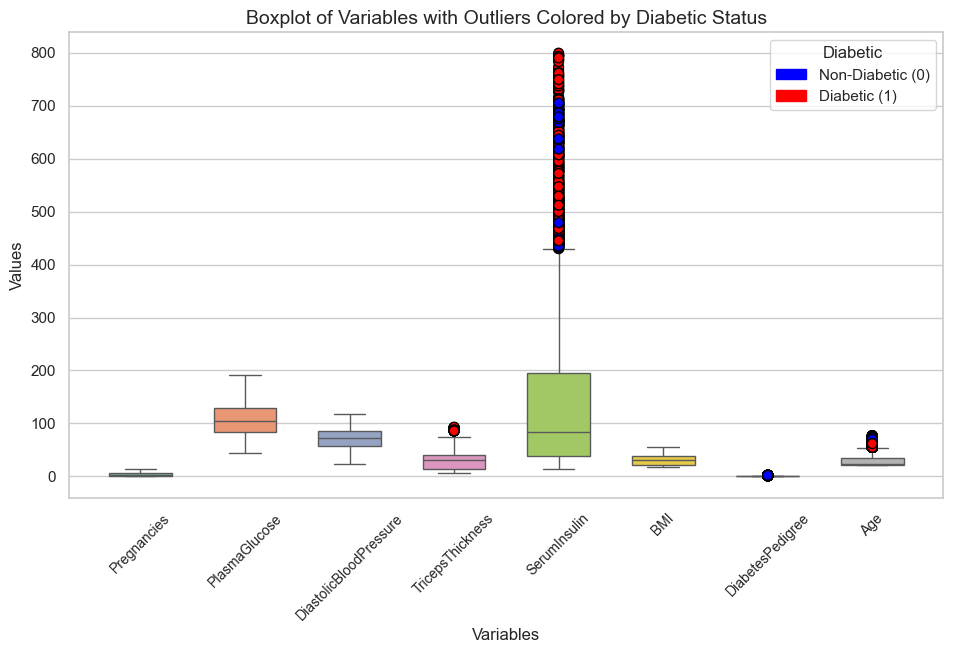

In [8]:
import seaborn as sns
import numpy as np


# Melt the DataFrame to long-form for easier plotting
df_melted = df.melt(id_vars='Diabetic', var_name='Variable', value_name='Value')

# Initialize the plot
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Generate a boxplot without the outliers
sns.boxplot(
    x='Variable',
    y='Value',
    data=df_melted,
    width=0.6,
    palette='Set2',  # Unique colors per variable
    showfliers=False  # Hide default outliers
)

# Overlay individual points and color outliers based on Diabetic status
for i, variable in enumerate(df_melted['Variable'].unique()):
    subset = df_melted[df_melted['Variable'] == variable]
    
    # Calculate whisker limits for outliers
    Q1 = np.percentile(subset['Value'], 25)
    Q3 = np.percentile(subset['Value'], 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = subset[(subset['Value'] < lower_limit) | (subset['Value'] > upper_limit)]
    
    # Plot outliers as scatter points with colors based on 'Diabetic'
    plt.scatter(
        [i] * len(outliers),  # X-coordinates (aligned with boxplot position)
        outliers['Value'],  # Y-coordinates
        c=outliers['Diabetic'].apply(lambda x: 'blue' if x == 0 else 'red'),
        edgecolor='black',
        s=50,  # Marker size
        zorder=5,  # Ensure points are on top
        label='_nolegend_'
    )

# Add legend for color meaning
from matplotlib.patches import Patch
legend_handles = [
    Patch(color='blue', label='Non-Diabetic (0)'),
    Patch(color='red', label='Diabetic (1)')
]
plt.legend(handles=legend_handles, loc='upper right', title='Diabetic')

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Customize the plot
plt.title("Boxplot of Variables with Outliers Colored by Diabetic Status", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Adjust layout for clarity
plt.tight_layout(pad=2)

# Show the plot
plt.show()



In terms of outliers, we have 4 variables to worry about, the **Serum Insulin** seem to be the most challenging case to study, we can also add that our outliers are concerned by higher values not lower values (to confirm with the variable DiabetesPedigree).

Let's have a deeper look at those 4 variables.

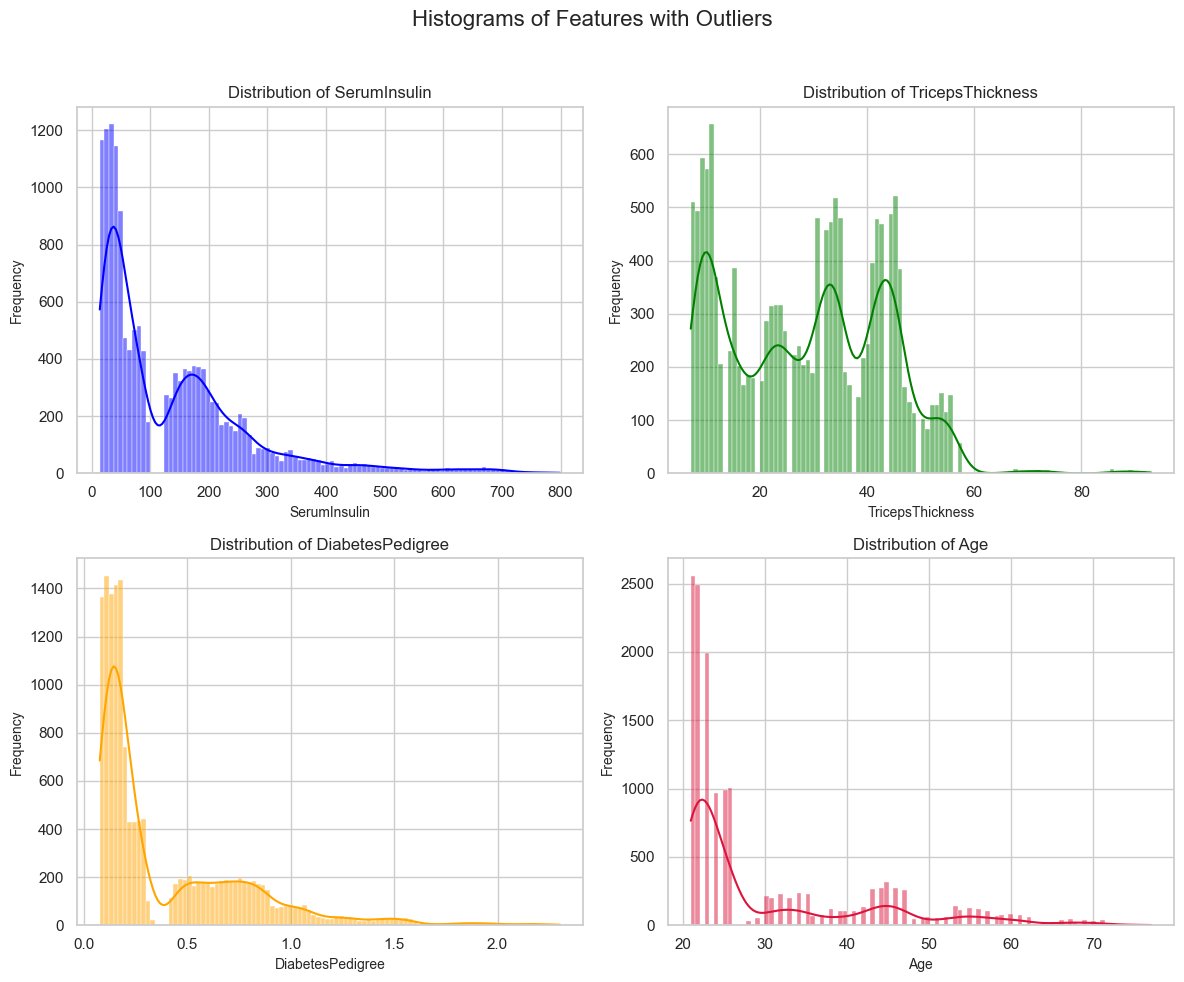

In [9]:


# Set Seaborn style for nice visuals
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Define the 4 features to plot
outliers_features = ['SerumInsulin', 'TricepsThickness', 'DiabetesPedigree', 'Age']

# Define a list of colors for each feature
colors = ['blue', 'green', 'orange', 'crimson']

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the figure size as needed
fig.suptitle("Histograms of Features with Outliers", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature with unique colors
for i, (feature, color) in enumerate(zip(outliers_features, colors)):
    sns.histplot(df[feature], bins=100, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f"Distribution of {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure the main title does not overlap
plt.show()


When we focus on the type of distribution of the variables with outliers, we can see that, most of them have a skewed looking shape more or less.

Based on that, we may be tempted to keep the outliers and to just add a $\log$ transformation to reduce theirs impacts.

But before going any further, let's check the impacts it may have on the balance of the currents classes.

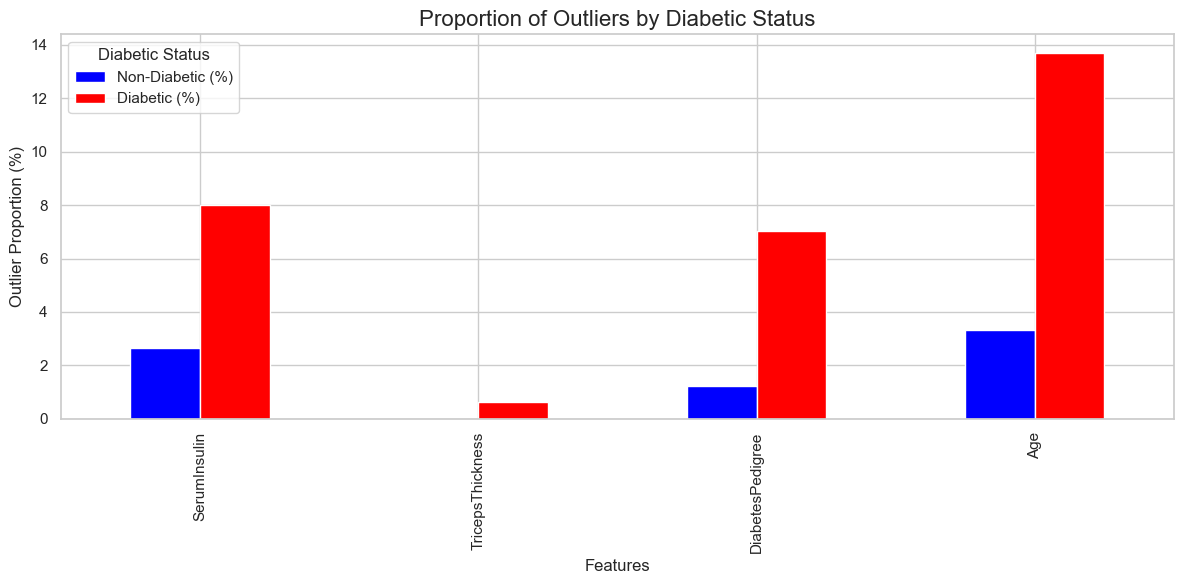

In [10]:

# Set Seaborn style for nice visuals
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Create a DataFrame to store outlier-related data
df_outliers = pd.DataFrame(index=df.index)

# Proportion of Outliers per Category (Diabetic=0 and Diabetic=1)
outlier_proportions = []

# Detect and save outliers in df_outliers
for feature in outliers_features:
    # Detect outliers for the current feature
    is_outlier = detect_outliers_iqr(df[feature])
    
    # Add binary indicator to df_outliers (1 = outlier, 0 = non-outlier)
    df_outliers[feature] = is_outlier.astype(int)
    
    # Add the actual outlier values to df_outliers
    outlier_column_name = f"{feature}_outliers"
    df_outliers[outlier_column_name] = df[feature].where(is_outlier, other=pd.NA)
    
    # Calculate proportion of outliers for each group
    proportions = df.groupby("Diabetic")[feature].apply(
        lambda x: is_outlier.loc[x.index].mean() * 100
    )
    outlier_proportions.append(proportions)

# Combine results into a DataFrame for easier plotting
outlier_summary = pd.DataFrame(outlier_proportions, index=outliers_features)
outlier_summary.columns = ['Non-Diabetic (%)', 'Diabetic (%)']

# Plot the proportions as a grouped barplot
outlier_summary.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])
plt.title("Proportion of Outliers by Diabetic Status", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Outlier Proportion (%)", fontsize=12)
plt.legend(title="Diabetic Status")
plt.tight_layout()
plt.show()



We can clearly see that most of time, the outliers are from the class of those with diabetise which is the class **1**.

And remember that this the class that is under represent on the dataset, so by removing or reduce the impacts of the outliers, we may lose a lot of valuable and specialy "rare" information on our unbalance variable to predict.

So we may just keep them and later on may be check if our models are doing better without them.

Now let's see if it will be interesting to add some functionnal changes to some variable or to remove them from the database

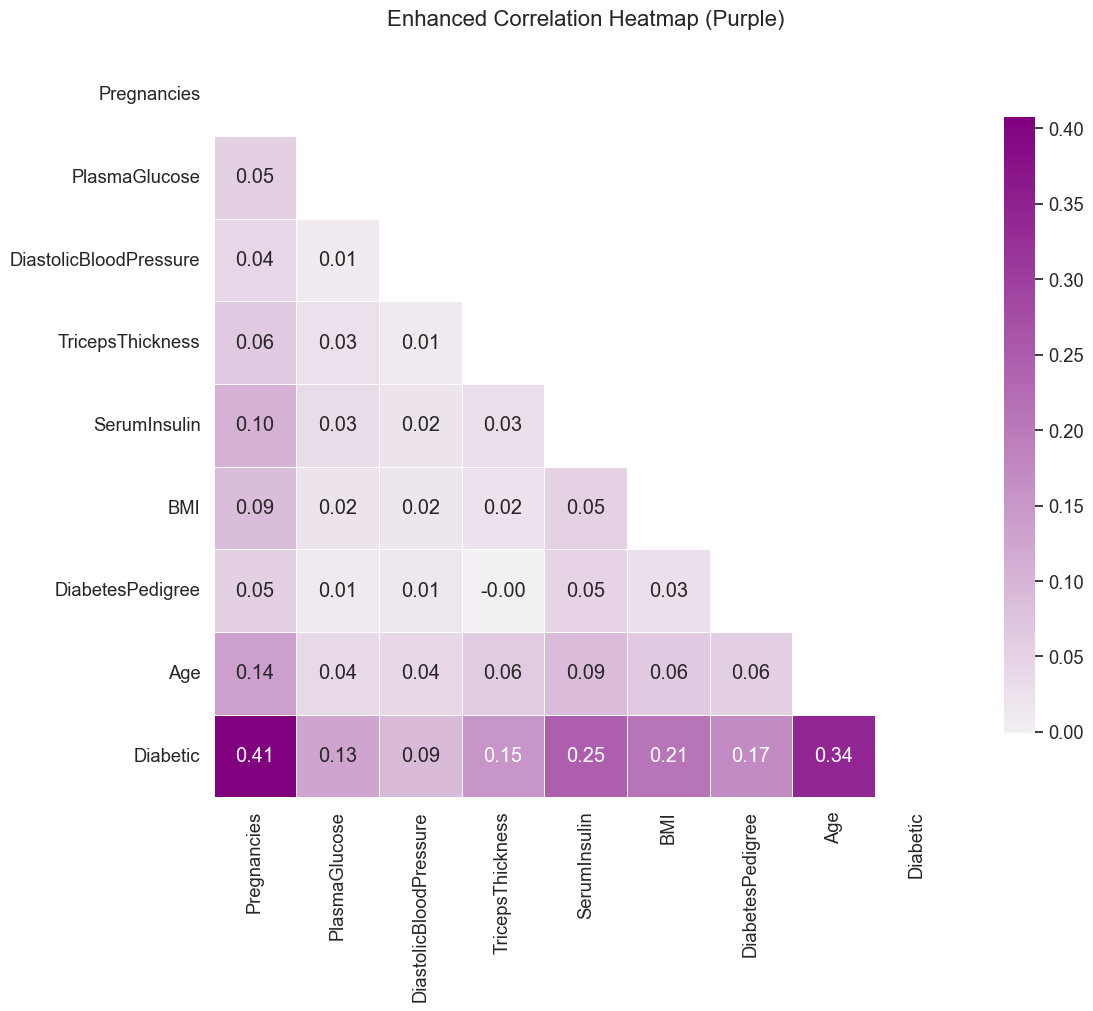

In [11]:
# Set a larger figure size and clean style for readability
plt.figure(figsize=(12, 10))
sns.set(style="white", font_scale=1.2)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle (for a clean look)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define a purple colormap
cmap = sns.light_palette("purple", as_cmap=True)  # Light purple gradient colormap

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    mask=mask,  # Apply the mask
    cmap=cmap,  # Use the purple colormap
    annot=True,  # Show correlation coefficients
    fmt=".2f",   # Format numbers to 2 decimal places
    linewidths=0.5,  # Add lines between cells for better readability
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    square=True  # Keep cells square-shaped
)

# Add a title
plt.title("Enhanced Correlation Heatmap (Purple)", fontsize=16, pad=20)

# Display the plot
plt.show()


Base on the corrplot, all our variables have a correlation below 0.5 which means that we can keep all the variables on our data base due to none correlation between each overs.


Now let's check if pairs of variable can clearly define clusters of people with diabetise or not.

Let's check that with a pairplot.

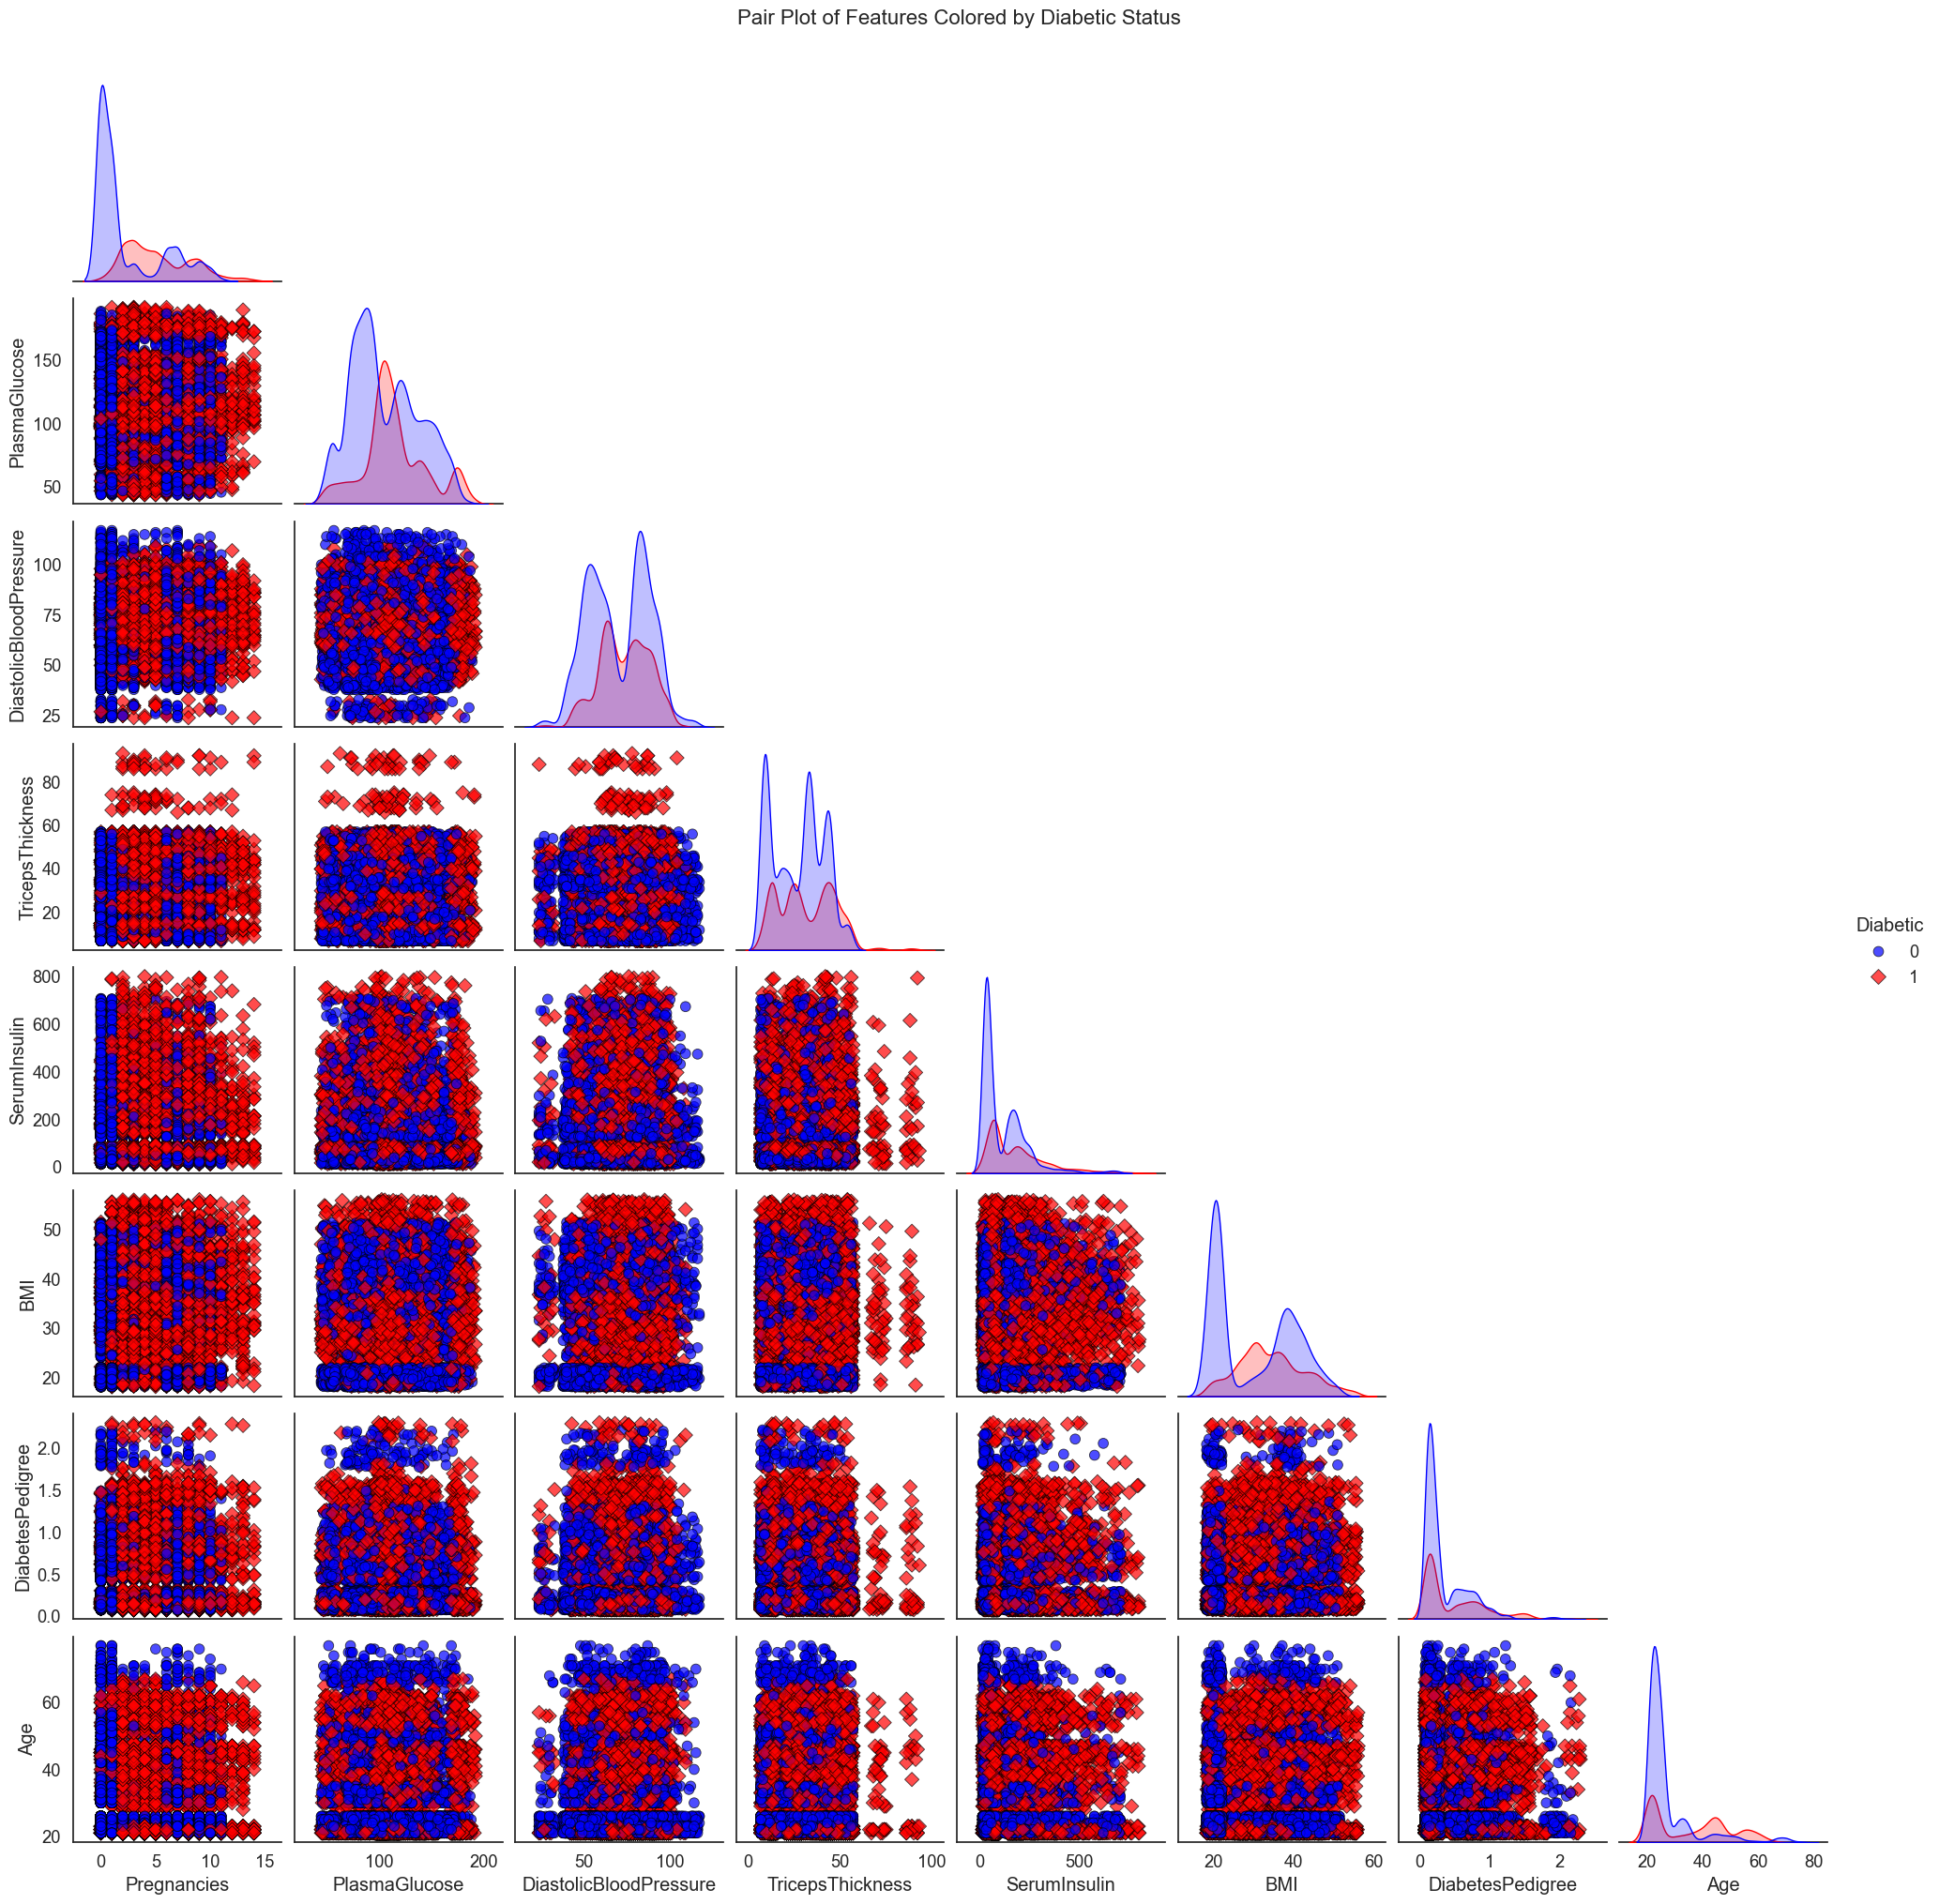

In [12]:
# Custom color palette for the binary class: 0 -> Blue, 1 -> Red
palette = {0: "blue", 1: "red"}

# Create the pair plot
g = sns.pairplot(
    df, 
    hue="Diabetic", 
    palette=palette,
    diag_kind="kde",  # KDE plots on the diagonal
    markers=["o", "D"],  # Use distinct markers for each class
    corner=True,
    plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'black'}  # Adjust marker size, transparency, and edges
)

# Add a main title
g.fig.suptitle("Pair Plot of Features Colored by Diabetic Status", y=1.02, fontsize=16)

# Display the plot
plt.show()

As we can see on the graph, the answer is no.

Let's check if individualy, some variable are irrelevant in order to predictic if yes or not a person have **Diabetise**

C:\Users\kmaha\AppData\Local\Temp\ipykernel_28408\3275324252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmaha\AppData\Local\Temp\ipykernel_28408\3275324252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmaha\AppData\Local\Temp\ipykernel_28408\3275324252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmaha\AppData\Local\Temp\ipykernel_28408\3275324252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

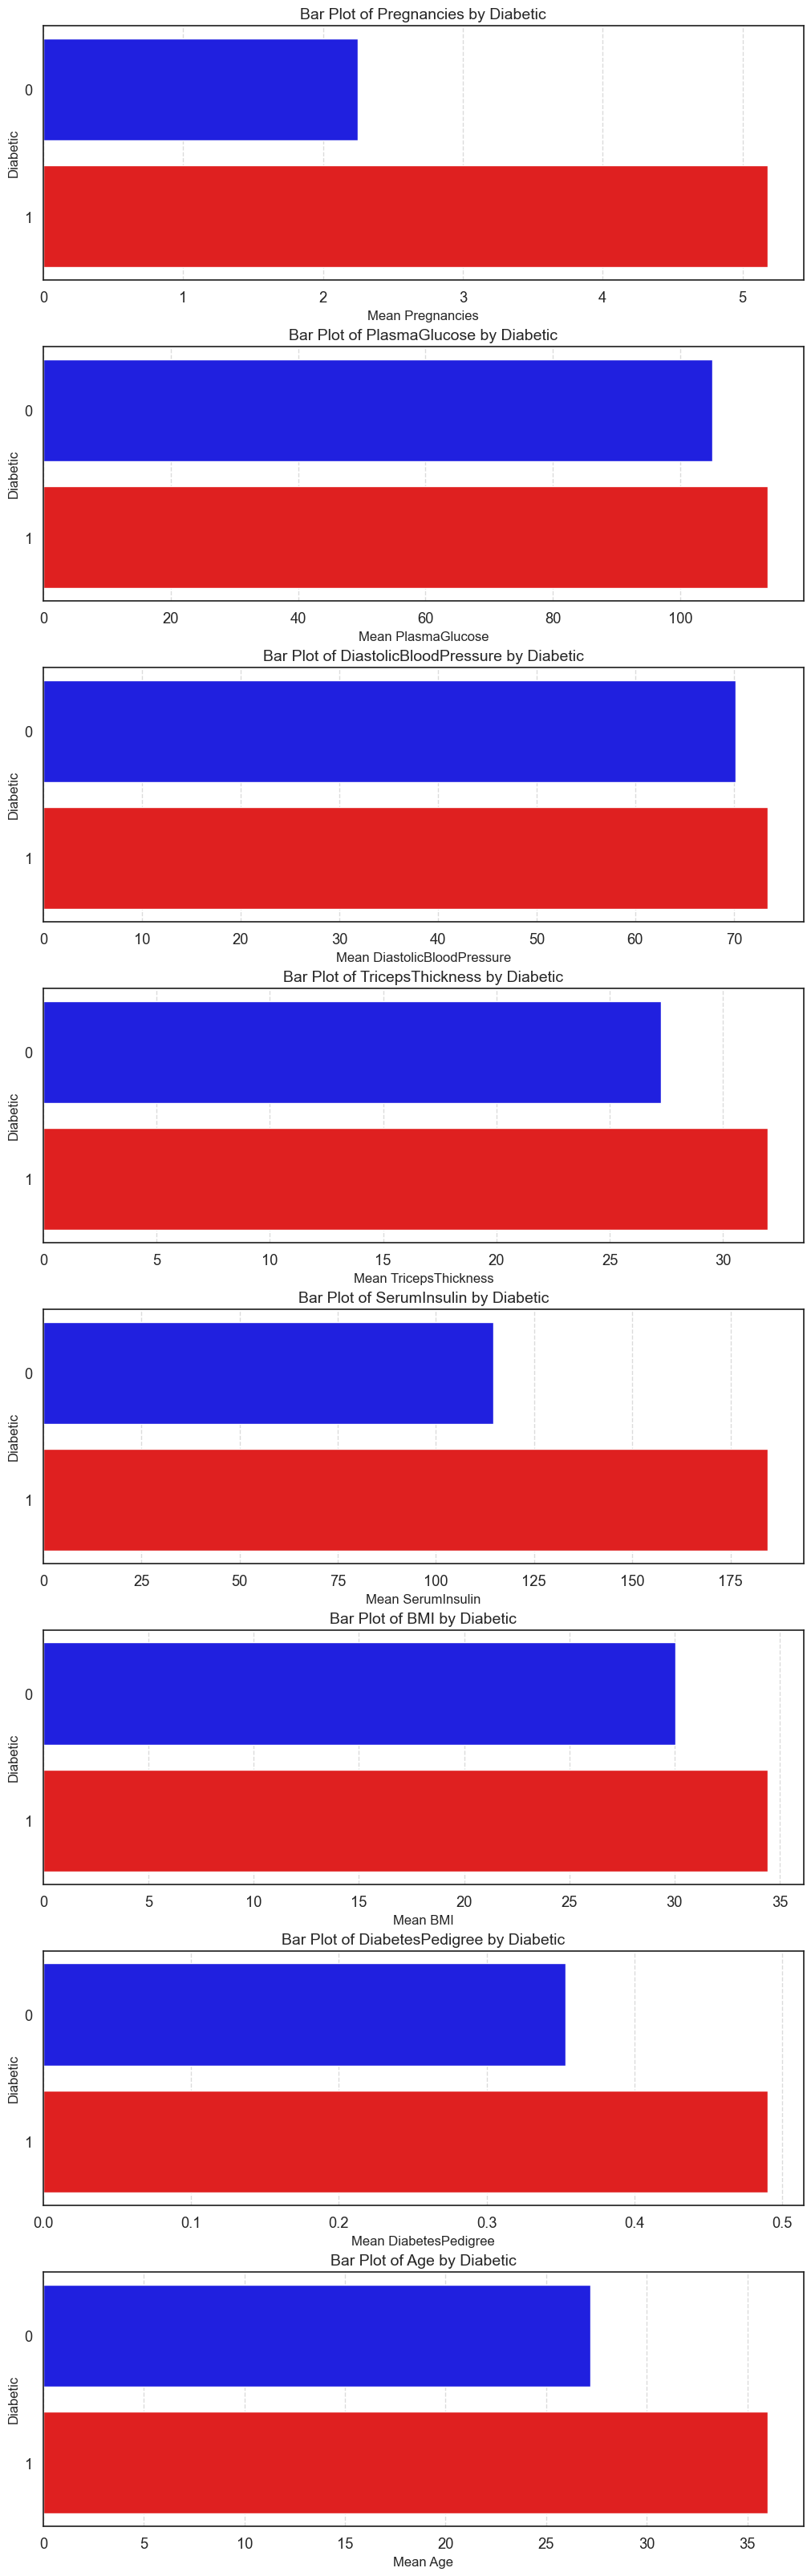

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_horizontal_bar_in_rows(df, binary_column):
    """
    Creates a row of horizontal bar plots for each numeric column in the DataFrame with a specified binary column as X.

    Args:
    df (pd.DataFrame): Input DataFrame.
    binary_column (str): The binary column to use as the grouping variable.
    """
    # Ensure the binary column is present
    if binary_column not in df.columns:
        raise ValueError(f"The specified column '{binary_column}' is not in the DataFrame.")
    
    # Convert the binary column to a string if needed
    df[binary_column] = df[binary_column].astype(str)

    # Filter numeric columns excluding the binary column
    numeric_columns = [col for col in df.select_dtypes(include='number').columns if col != binary_column]
    
    # Set up the plot grid
    num_vars = len(numeric_columns)
    fig, axes = plt.subplots(num_vars, 1, figsize=(10, 4 * num_vars), constrained_layout=True)
    
    # If there's only one numeric column, axes might not be iterable
    if num_vars == 1:
        axes = [axes]

    for ax, col in zip(axes, numeric_columns):
        # Prepare data for plotting
        grouped_data = df.groupby(binary_column)[col].mean().reset_index()
        
        # Plot the data horizontally
        sns.barplot(
            y=binary_column, 
            x=col, 
            data=grouped_data, 
            ax=ax, 
            palette={"0": "blue", "1": "red"},
            orient="h"  # Horizontal orientation
        )
        
        # Customize the subplot
        ax.set_title(f"Bar Plot of {col} by {binary_column}", fontsize=14)
        ax.set_xlabel(f"Mean {col}", fontsize=12)
        ax.set_ylabel(binary_column, fontsize=12)
        ax.grid(axis="x", linestyle="--", alpha=0.7)

    plt.show()



# Example usage
# df = pd.read_csv("your_dataset.csv")
plot_horizontal_bar_in_rows(df, binary_column="Diabetic")


Based on the graphics, the only variable that have high relevancy are, **Pregnacie** and **is_outlier** the others have i like to say medium to low values.

Let's do some statistical tests to check if we have significants differences between groups even if it is low differences, in our case, we are working with not so much data, so we can give our self to have the freedom to keep as much variable as possible even if the impacts are low, statistical significancy may be enough.

We will use the **Mann Whitney test** due to the fa ct thtat is condition are just really easy to fulfill and by default we fulfill them so it is just an plug and play (not like the t test).

In [14]:
import pandas as pd
from scipy.stats import mannwhitneyu

def mann_whitney_test(df, binary_var, alpha=0.05):
    """
    Separates a DataFrame into two groups based on a binary variable and applies 
    the Mann-Whitney U test to all numeric variables. Includes a significance column.
    
    Parameters:
    - df: pd.DataFrame
        The DataFrame containing the data.
    - binary_var: str
        The name of the binary variable (column) used for grouping.
    - alpha: float, optional (default=0.05)
        The significance level for determining if a result is statistically significant.
        
    Returns:
    - results: pd.DataFrame
        A DataFrame containing the U statistic, p-value, and significance for each numeric variable.
    """
    # Validate input
    if binary_var not in df.columns:
        raise ValueError(f"The binary variable '{binary_var}' is not in the DataFrame.")
    
    # Identify numeric columns
    numeric_vars = df.columns.drop(binary_var)
    if numeric_vars.empty:
        raise ValueError("No numeric variables found in the DataFrame.")

    # Prepare results
    results = []

    # Separate the groups based on the binary variable
    group_0 = df[df[binary_var] == "0"]
    group_1 = df[df[binary_var] == "1"]

    # Ensure both groups have data
    if group_0.empty or group_1.empty:
        raise ValueError("One of the groups is empty. Check the binary variable values.")

    # Apply the Mann-Whitney U test for each numeric variable
    for var in numeric_vars:
        u_stat, p_value = mannwhitneyu(group_0[var], group_1[var], alternative='two-sided')
        is_significant = p_value < alpha
        results.append({
            "Variable": var, 
            "U statistic": u_stat, 
            "p-value": p_value, 
            "is_significant": is_significant
        })

    # Convert results to a DataFrame
    return pd.DataFrame(results)



# Example usage:
test_results = mann_whitney_test(df, binary_var="Diabetic")
print(test_results)


                 Variable  U statistic        p-value  is_significant
0             Pregnancies   10473690.0   0.000000e+00            True
1           PlasmaGlucose   20570666.5   3.066940e-70            True
2  DiastolicBloodPressure   22193930.0   3.035833e-29            True
3        TricepsThickness   20390006.5   5.597841e-76            True
4            SerumInsulin   15619295.0  3.980423e-308            True
5                     BMI   18808251.0  2.076209e-135            True
6        DiabetesPedigree   21615572.0   9.424051e-42            True
7                     Age   18747808.0  8.794664e-140            True


Based on the test results, we will keep every features from our database.

Now let's do some machine learning.

# III. Machine Learning : Model Selection, Comparison and Evaluation

# III.1 Model Selection

Here, we are dealing this a classification case and we do not have a hugh amout of data to process, nor we want to understand the variables that causes Diabetise, we just want to have the best prediction model possible so we have the freedom to test every model we want.

That being said, in our EDA step, we have gathered some knowledge that are usefull to takes in account.

First, we do not have a clear separation that can drowen from each couple of variable (pairplot) and we have a highly significant distinction for each variables laws depending on the groups the values belong.

So a lot of classification models can fit our needs.

Let's try those :

* **GLM**
* **Random Forest**

The goal here is to test methods that don't cost a lot in term of building process and computation in the first place and see what we can except from those models first.

Our **Baseline** will be the naive prediction which is basically predicting the most domination class and each try and in our EDA, we have seen that we will get an error of **33,33%** because the dominant class (class 0) represent **66,7%** percent of the dataset.

To compare the results, we will use the **bootstrap** method in order for us to have an idea of the mean accuracy of the model and also the variance of the prediction quality. The bootstrap method will also insure us with a lot of score to compare so we can have a really robust expectation of the quality of our models.

We will also use the **stratification** method which consist of keep the same proportion of the initial classes in the variable to predict when splitting the data in train and test datasets.

C:\Users\kmaha\AppData\Local\Temp\ipykernel_28408\2299905228.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


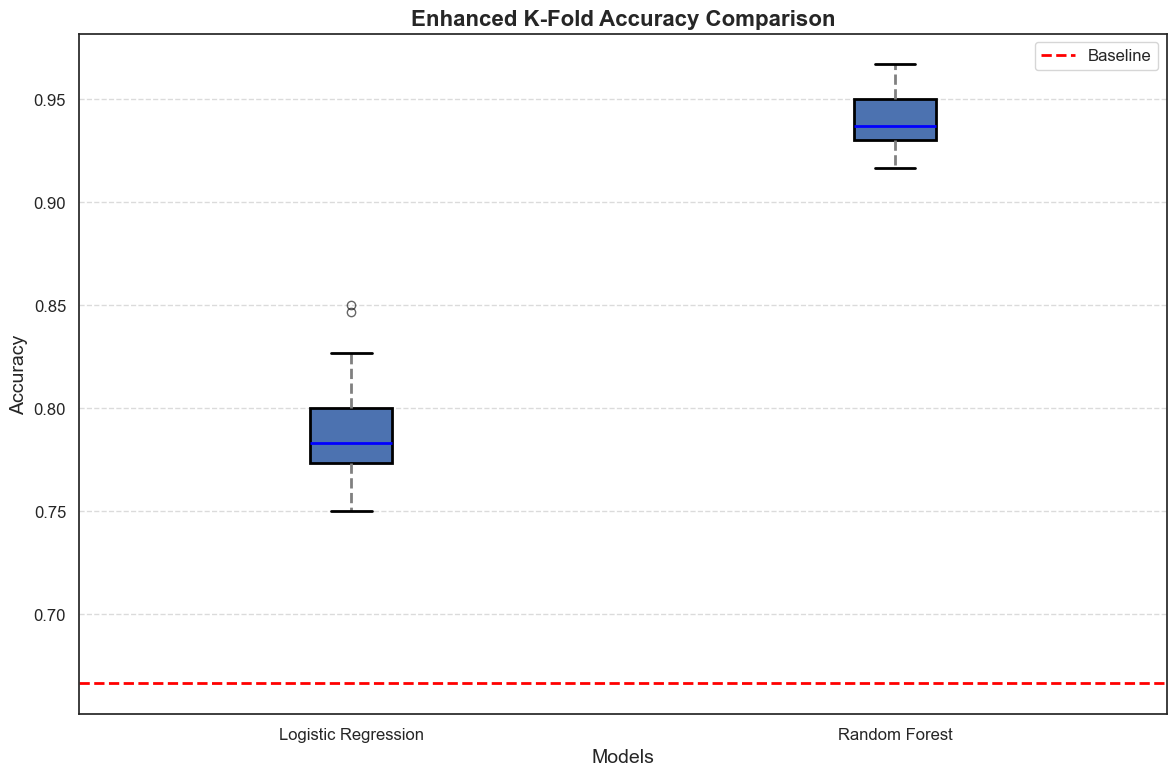

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

def kfold_evaluation(models, X, y, n_splits=5, random_state=42):
    """
    Evaluate models using Stratified K-Fold cross-validation.
    
    Parameters:
    - models: dict
        Dictionary of models with their names as keys.
    - X: pd.DataFrame
        Feature matrix.
    - y: pd.Series or np.array
        Target variable.
    - n_splits: int, optional (default=5)
        Number of folds in Stratified K-Fold.
    - random_state: int, optional (default=42)
        Random state for reproducibility.
        
    Returns:
    - results: dict
        Dictionary containing accuracy results for each model.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    results = {name: [] for name in models.keys()}
    
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[name].append(accuracy)
    
    return results

# Setup the variables
X = df.columns.drop("Diabetic")
y = "Diabetic"

X = df[X]
y = df[y].astype(int)

# Baseline model (proportion of the dominant class)
dominant_class_proportion = y.value_counts(normalize=True).max()

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Perform K-Fold evaluation
results = kfold_evaluation(models, X, y, n_splits=50)

### Boxplot visualization


# Improved Boxplot Visualization
def plot_kfold_results(results, baseline, title="K-Fold Accuracy Comparison"):
    """
    Plot the results of K-Fold evaluation as enhanced boxplots.

    Parameters:
    - results: dict
        Dictionary containing accuracy results for each model.
    - baseline: float
        Baseline accuracy value to plot as a horizontal line.
    - title: str, optional
        Title of the plot.
    """
    plt.figure(figsize=(12, 8))
    
    # Boxplot settings
    boxprops = dict(linewidth=2, color="black")
    whiskerprops = dict(linewidth=2, linestyle="--", color="gray")
    capprops = dict(linewidth=2, color="black")
    medianprops = dict(linewidth=2, color="blue")
    flierprops = dict(marker='o', color='red', alpha=0.6)
    
    # Create the boxplot
    plt.boxplot(
        results.values(),
        labels=results.keys(),
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        flierprops=flierprops,
        patch_artist=True
    )
    
    # Add colors to boxes
    for patch in plt.gca().artists:
        patch.set_facecolor("lightgray")
        patch.set_alpha(0.7)
    
    # Plot the baseline
    plt.axhline(y=baseline, color="red", linestyle="--", linewidth=2, label="Baseline")
    
    # Add titles and labels
    plt.title(title, fontsize=16, fontweight="bold")
    plt.ylabel("Accuracy", fontsize=14)
    plt.xlabel("Models", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the improved plot function
plot_kfold_results(results, dominant_class_proportion, title="Enhanced K-Fold Accuracy Comparison")





Based on the results, the better model in term of mean accuracy and variance is the **Random Forest**.